<a href="https://colab.research.google.com/github/Kayumov094/Subplots_amaliyot/blob/main/subplot_amaliyot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ushbu amaliyotda uybor.uz saytidan yuklab olingan ma'lumotlar tahlili bilan shu'gullanamiz.

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/uybor_scrapping.csv?raw=true")
df.head()

,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7421 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7421 non-null   object 
 1   district    7421 non-null   object 
 2   rooms       7421 non-null   int64  
 3   size        7421 non-null   float64
 4   level       7421 non-null   int64  
 5   max_levels  7421 non-null   int64  
 6   price       7421 non-null   int64  
 7   lat         7421 non-null   float64
 8   lng         7421 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 521.9+ KB


#### Yuqoridagi jadvalda Toshkent shahridagi sotildagian uylar haqida ma'lumotlar jamlangan.

## 1-VAZIFA. Jadvaldan xonalari 5 xonadan ko'p bo'lgan, narxi 200000 mingdan, maydoni 250kv.m dan ortiq bo'lgan uylarni tashlab yuboring

In [ ]:
#JAVOBINGIZNI SHUYERGA YOZING
df[df['rooms']>5] # besh xonadan katta bo'lganlarni ajratib oldim
df[df['price']>200000] # narxi  200000 dan katta bolganlarni ajratib oldim
df[df['size']>250] # maydoni 250 katta bo'lganlarni ajratib oldim
df.drop(df[df['rooms']>5].index, axis = 0, inplace=True)
df.drop(df[df['price']>200000].index, axis = 0, inplace=True)
df.drop(df[df['size']>250].index, axis = 0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7223 entries, 0 to 7420
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7223 non-null   object 
 1   district    7223 non-null   object 
 2   rooms       7223 non-null   int64  
 3   size        7223 non-null   float64
 4   level       7223 non-null   int64  
 5   max_levels  7223 non-null   int64  
 6   price       7223 non-null   int64  
 7   lat         7223 non-null   float64
 8   lng         7223 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 564.3+ KB


In [ ]:
#@title Natija
df=df[df['rooms']<6]
df=df[df['size']<250]
df=df[df['price']<200000]
df.shape

(7216, 9)

In [ ]:
df['rooms']

,rooms
0,3
1,2
2,2
3,3
4,3
...,...
7416,1
7417,2
7418,2
7419,1


## 2-VAZIFA. `subplot` yordamida uylarning narxi va xonalar soni taqsimoti grafiklarini yonma yon chizing

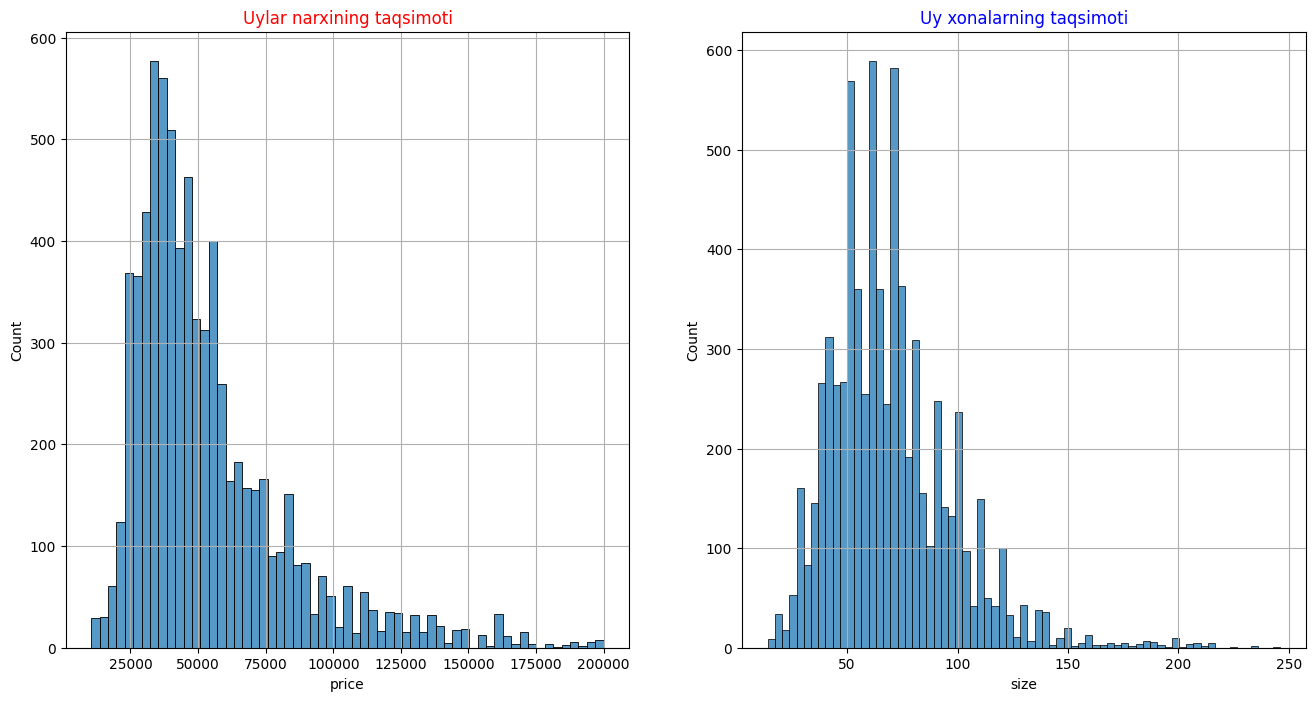

In [119]:
#JAVOBINGIZNI SHUYERGA YOZING
fig, axes = plt.subplots(1,2, figsize=(16,8))
# birinchi podgrafik uchun plot chizaman
sns.histplot(ax=axes[0], data = df, x='price')
axes[0].set_title("Uylar narxining taqsimoti", color='r')
axes[0].grid(True)

# ikkinchi subplot uchun polt chizaman
sns.histplot(ax=axes[1], data = df, x='size')
axes[1].set_title("Uy xonalarning taqsimoti", color='b')
axes[1].grid(True)
plt.show()

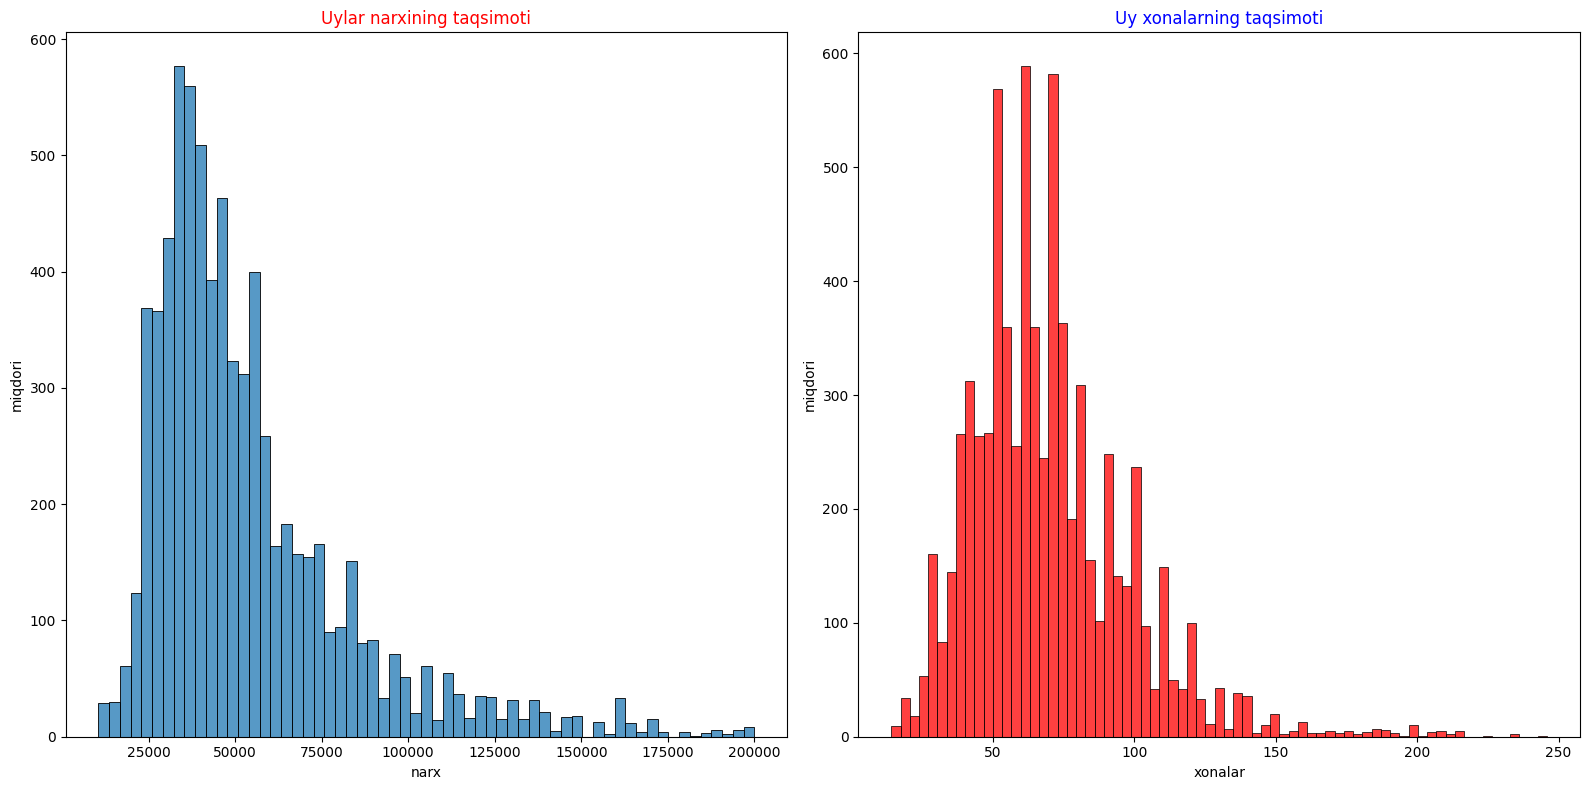

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,8))
# birinchi podgrafik uchun plot chizaman
sns.histplot(ax=axes[0], data = df, x='price')
axes[0].set_title("Uylar narxining taqsimoti", color='r')
axes[0].set_xlabel("narx")
axes[0].set_ylabel("miqdori")

# ikkinchi subplot uchun polt chizaman
sns.histplot(ax=axes[1], data = df, x='size', color= 'r')
axes[1].set_title("Uy xonalarning taqsimoti", color='b')
axes[1].set_xlabel("xonalar")
axes[1].set_ylabel("miqdori")
plt.tight_layout()
plt.show()

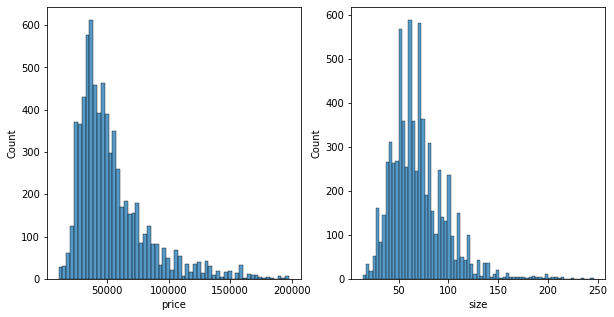

In [ ]:
#@title Kutilgan natija
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df, x='price')
plt.subplot(1,2,2)
sns.histplot(data=df, x='size')
plt.show()

### 2-VAZIFA. Uylarning narxi taqsimoti va narx va maydoni o'rtasidagi bog'liqlik grafiklarini bitta chizmada ustma ust chiqaring.

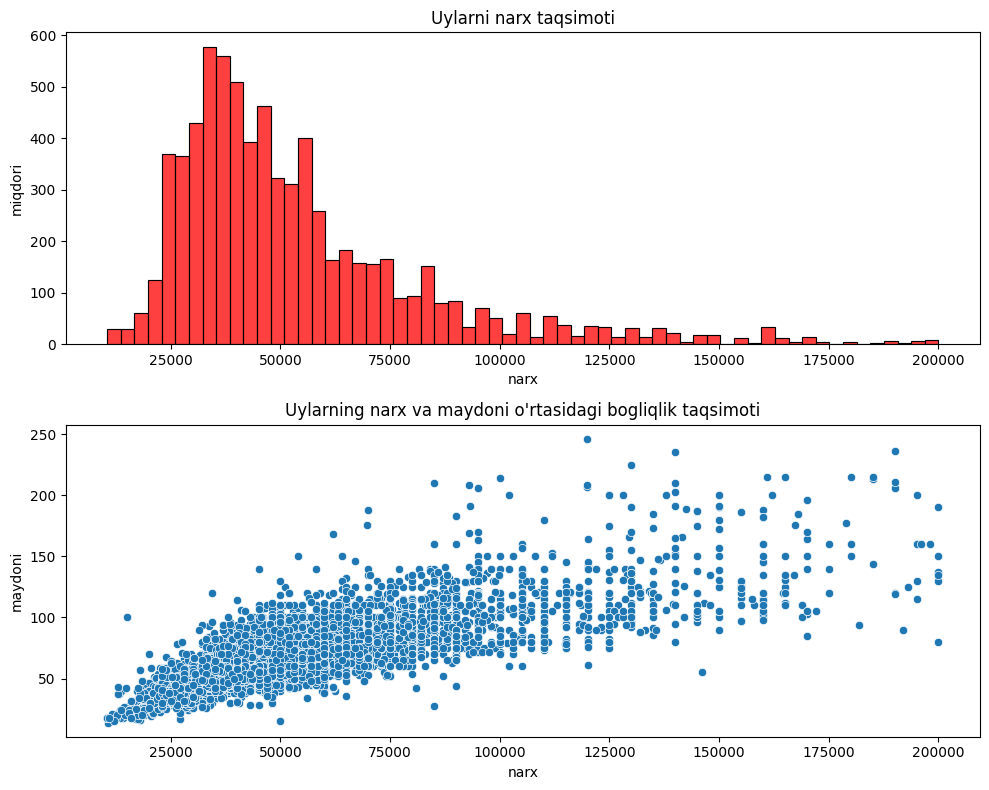

In [120]:
# JAVOB UCHUN JOY
fig, axes = plt.subplots(2,1, figsize = (10,8))
# birinchi subplotga plot chizaman
sns.histplot(ax=axes[0], data=df, x='price', color = 'r')
axes[0].set_title("Uylarni narx taqsimoti")
axes[0].set_xlabel("narx")
axes[0].set_ylabel("miqdori")

# ikkinchi subplotga plot chizaman
sns.scatterplot(ax = axes[1], data = df, x=df['price'], y=df['size'])
axes[1].set_title("Uylarning narx va maydoni o'rtasidagi bogliqlik taqsimoti")
axes[1].set_xlabel("narx")
axes[1].set_ylabel("maydoni")
plt.tight_layout()

plt.show()

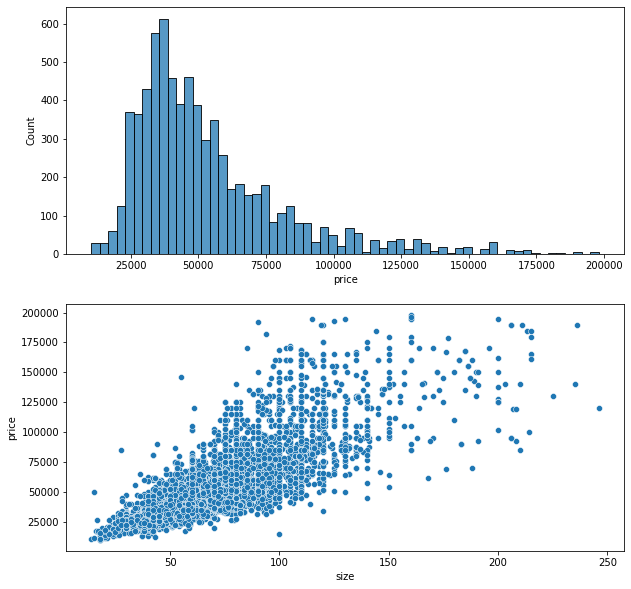

In [ ]:
#@title Kutilgan natija
fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0], data=df, x='price')
sns.scatterplot(ax=ax[1], data=df, x=df['size'], y=df['price'])
plt.show()

### 3-VAZIFA. Quyidagi grafikni chizing. Ahamiyat bering, oxirgi grafikda tumanlar bo'yicha uylarning o'rtacha narxi tasvirlangan.

In [99]:
tumanlar = df.groupby('district')['price'].mean()
tumanlar.values


array([29462.5       , 80758.46883853, 53059.40299625, 50172.50574713,
       42607.37662338, 44494.24050633, 45377.16594158, 63386.02535211,
       56261.55437352, 61595.65802269, 37000.        , 46927.04231626])

<ipython-input-117-1316078135>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)


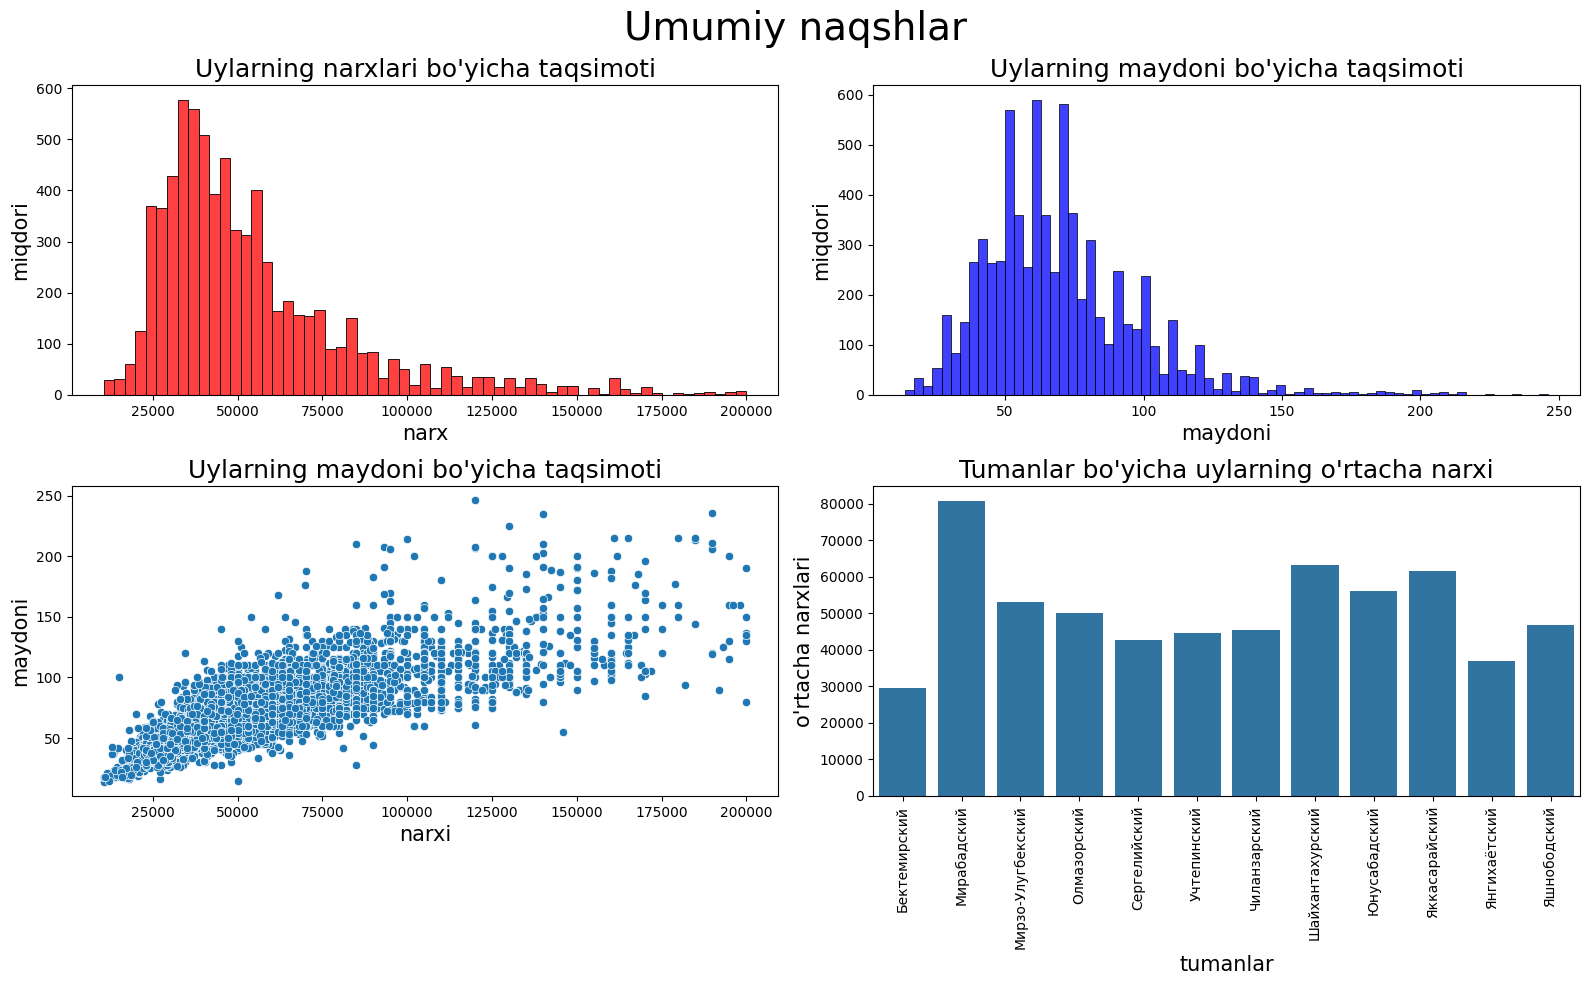

In [117]:
# JAVOB UCHUN JOY
fig, axes = plt.subplots(2,2, figsize = (16,10))
plt.suptitle("Umumiy naqshlar",fontsize=28)
# birinchi grafikni chizaman
sns.histplot(ax = axes[0,0], data = df,x = 'price', color = 'r')
axes[0,0].set_title("Uylarning narxlari bo'yicha taqsimoti", fontsize=18)
axes[0,0].set_xlabel("narx", fontsize=15)
axes[0,0].set_ylabel("miqdori", fontsize=15)

#ikkinchi subplotga plot chizaman
sns.histplot(ax=axes[0,1], data= df, x= 'size', color = 'b')
axes[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti", fontsize=18)
axes[0,1].set_xlabel("maydoni", fontsize=15)
axes[0,1].set_ylabel("miqdori", fontsize=15)

# uchinchi sublotga plot chizaman
sns.scatterplot(ax=axes[1,0], data = df, x = 'price', y = 'size' )
axes[1,0].set_title("Uylarning maydoni bo'yicha taqsimoti", fontsize=18)
axes[1,0].set_xlabel("narxi", fontsize=15)
axes[1,0].set_ylabel("maydoni", fontsize=15)

#to'rtinchi subplotga plot chizaman
sns.barplot(ax = axes[1,1], x = tumanlar.index, y = tumanlar.values)
axes[1,1].set_title("Tumanlar bo'yicha uylarning o'rtacha narxi", fontsize=18)
axes[1,1].set_xlabel("tumanlar", fontsize=15)
axes[1,1].set_ylabel("o'rtacha narxlari", fontsize=15)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

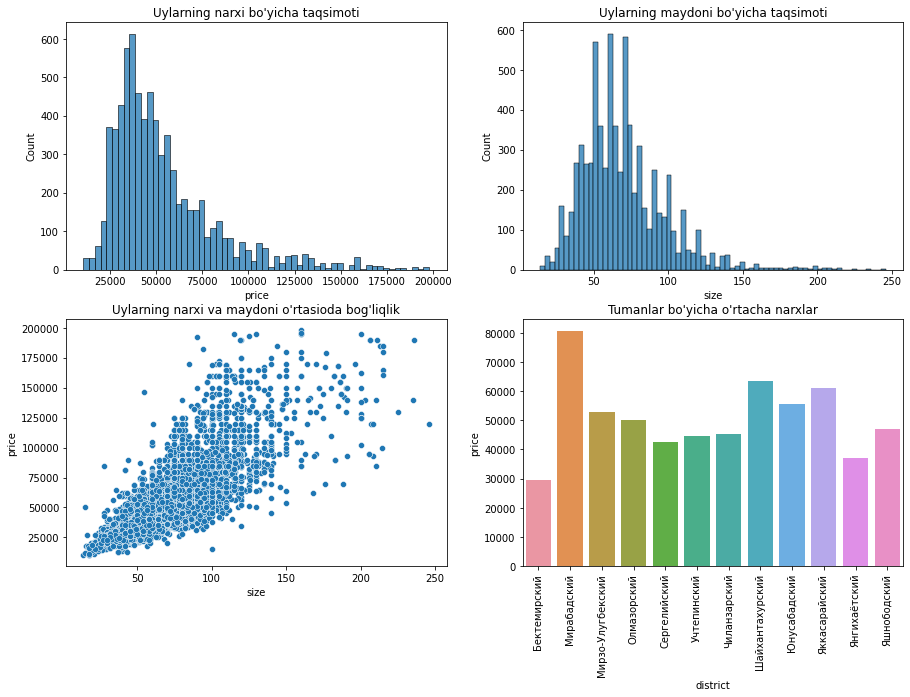

In [ ]:
#@title Kutilgan natija

# Tumanlar bo'yicha jamlangan df
distdf = df.groupby('district').mean()

#Grafiklarni chizamiz
fig, ax = plt.subplots(2, 2, figsize=(15,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0, 0], data=df, x='price')
sns.histplot(ax=ax[0, 1], data=df, x='size')
sns.scatterplot(ax=ax[1, 0], data=df, x=df['size'], y=df['price'])
sns.barplot(ax=ax[1, 1], x=distdf.index, y=distdf['price'])
# Har bir grafik uchun nom:
ax[0,0].set_title("Uylarning narxi bo'yicha taqsimoti")
ax[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti")
ax[1,0].set_title("Uylarning narxi va maydoni o'rtasioda bog'liqlik")
ax[1,1].set_title("Tumanlar bo'yicha o'rtacha narxlar")
plt.xticks(rotation=90)
plt.show()